# Data Visualization with matplotlib

In [238]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)

## Matplotlib

Like the ``np`` shorthand for NumPy and the ``pd`` shorthand for Pandas, we will use some standard shorthands for Matplotlib imports:

In [239]:
import matplotlib as mpl
import matplotlib.pyplot as plt
IPython_default = plt.rcParams.copy()

### Setting Styles

The ``plt.style`` directive chooses the aesthetic styles for our figures.

(array([   5.,   46.,  174.,  520.,  887.,  950.,  533.,  174.,   39.,    5.]),
 array([-3.66351528, -2.9242932 , -2.18507111, -1.44584903, -0.70662695,
         0.03259513,  0.77181721,  1.5110393 ,  2.25026138,  2.98948346,
         3.72870554]),
 <a list of 10 Patch objects>)

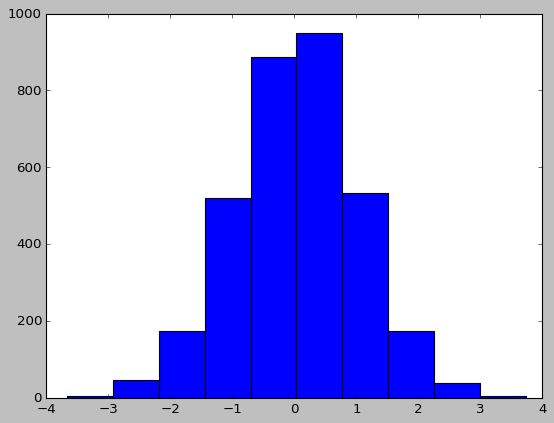

In [240]:
plt.style.use('classic')
x = np.random.randn(3333)
plt.hist(x)

In [241]:
print(plt.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn']


(array([    2.,    16.,   116.,   456.,   905.,  1021.,   585.,   191.,
           38.,     3.]),
 array([-4.17168171, -3.35897261, -2.54626351, -1.7335544 , -0.9208453 ,
        -0.10813619,  0.70457291,  1.51728201,  2.32999112,  3.14270022,
         3.95540933]),
 <a list of 10 Patch objects>)

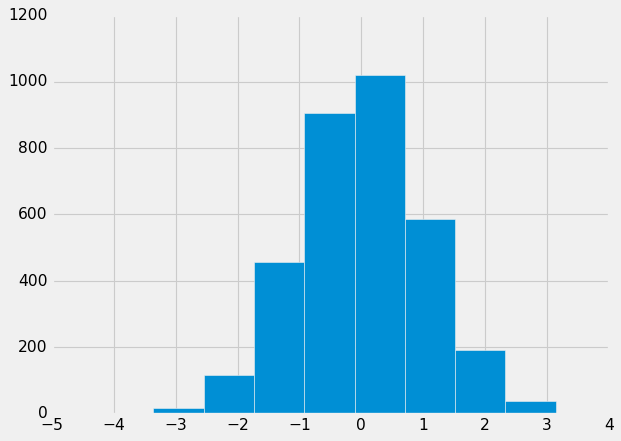

In [242]:
plt.style.use('fivethirtyeight')
x = np.random.randn(3333)
plt.hist(x)

### Plot Customization

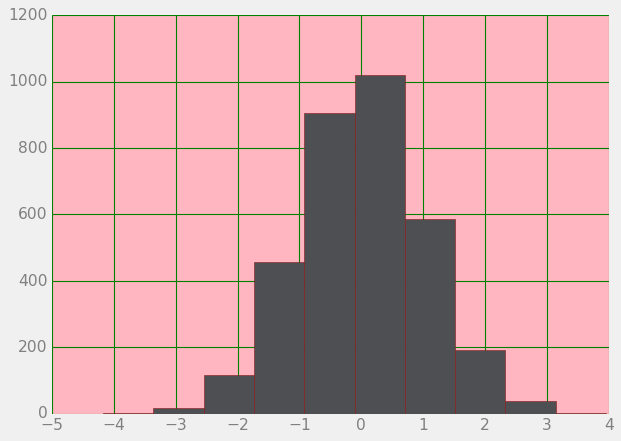

In [243]:
# use a pink background
ax = plt.axes(axisbg='#ffb6c1')
ax.set_axisbelow(True)

# draw solid green grid lines
plt.grid(color='g', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='#8c1515', color='#4d4f53');

## Defaults: ``rcParams``

When Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create.

You can use the ``plt.rc`` function to change some of these settings.

In [244]:
# Make plots larger
plt.rcParams['figure.figsize'] = (15, 7)
# Change default linewidth
plt.rc('lines', linewidth=3)
# Change default grid
plt.rc('grid', color='w', linestyle='solid')

(array([    2.,    16.,   116.,   456.,   905.,  1021.,   585.,   191.,
           38.,     3.]),
 array([-4.17168171, -3.35897261, -2.54626351, -1.7335544 , -0.9208453 ,
        -0.10813619,  0.70457291,  1.51728201,  2.32999112,  3.14270022,
         3.95540933]),
 <a list of 10 Patch objects>)

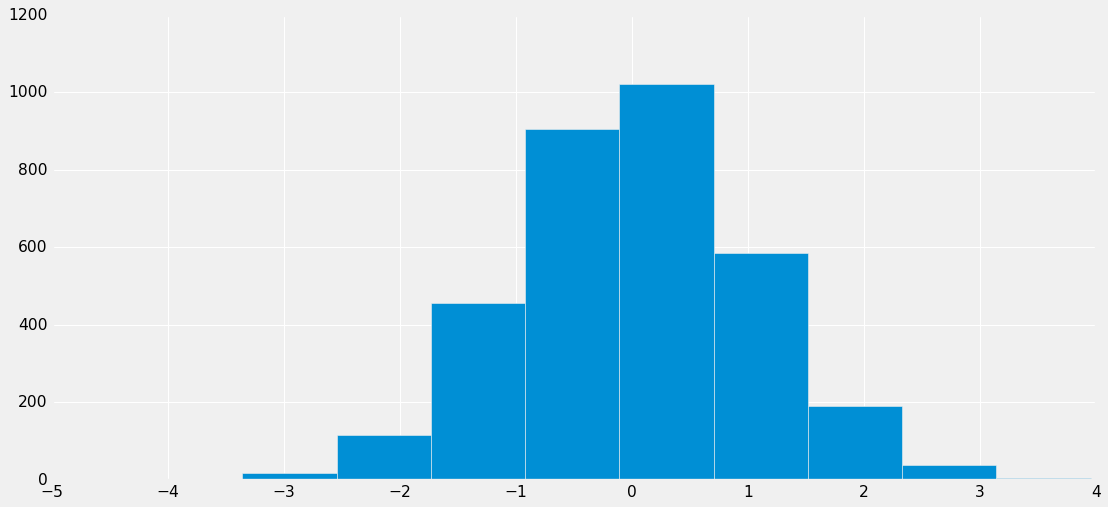

In [245]:
plt.hist(x)

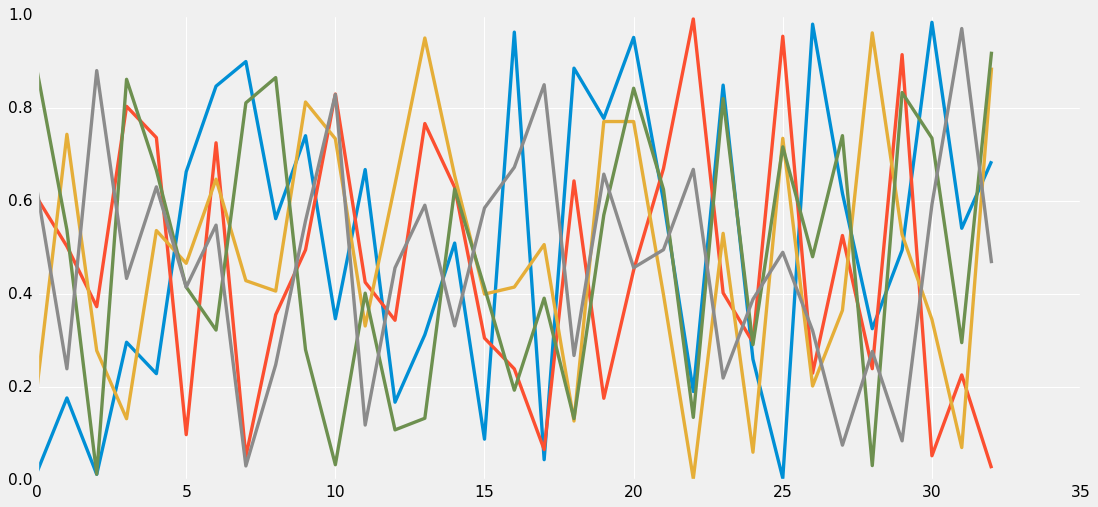

In [246]:
for i in np.arange(1,6,1.0):
    plt.plot(np.random.rand(33))

In [247]:
def side_by_side():
    fig, ax = plt.subplots(1, 2, figsize=(11, 5))
    ax[0].hist(np.random.randn(3333))
    for i in np.arange(1,6,1.0):
        ax[1].plot(np.random.rand(33))
    ax[1].legend(['l1', 'l2', 'l3'], loc='lower left')

In [248]:
# reset rcParams
plt.rcParams.update(IPython_default)

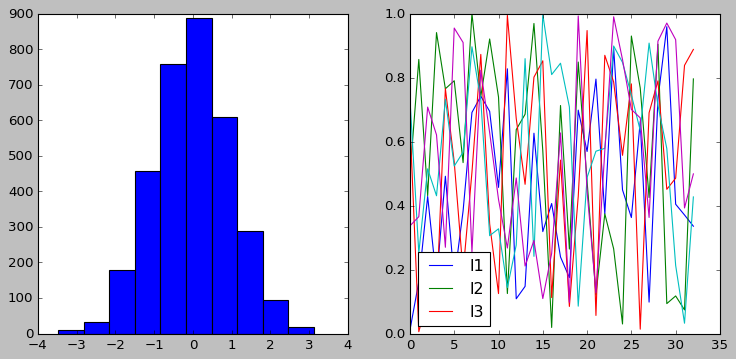

In [249]:
plt.style.use('classic')
side_by_side()

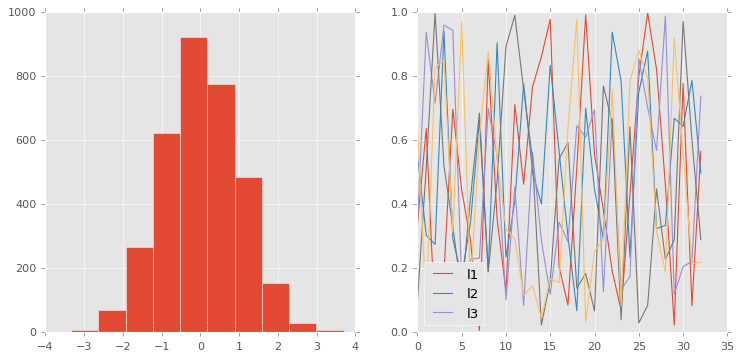

In [250]:
plt.style.use('ggplot')
side_by_side()

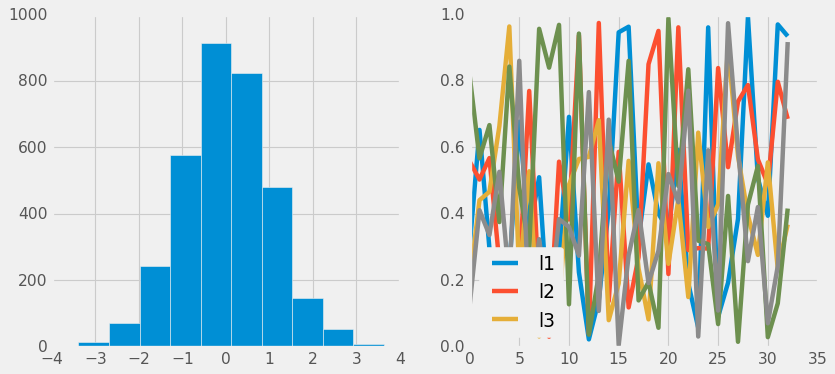

In [251]:
plt.style.use('fivethirtyeight')
side_by_side()

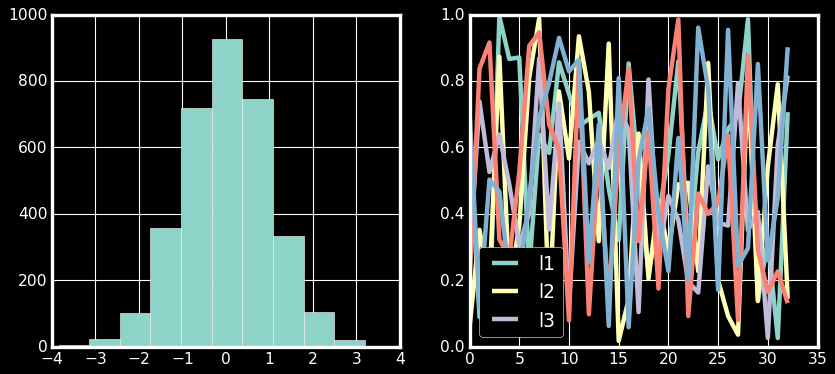

In [252]:
plt.style.use('dark_background')
side_by_side()

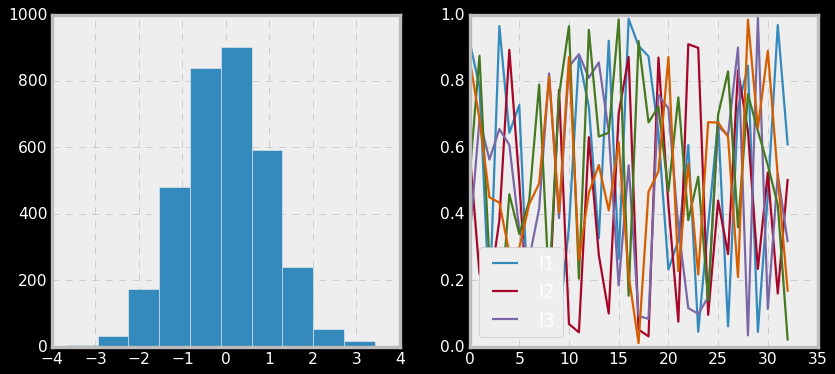

In [ ]:
# Bayesian Methods for Hackers bmh style
# Using style for one plot
with plt.style.context('bmh'):
    side_by_side()

In [ ]:
side_by_side()

## Line Plots

Plots start with a figure (canvas) and axes

In [ ]:
fig = plt.figure()
ax = plt.axes()

In [ ]:
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

In [ ]:
plt.style.use('ggplot')
x = np.linspace(0, 100, 1000)

fig = plt.figure()
plt.plot(x, np.sin(x), 'g-')
plt.plot(x, np.cos(x), 'b--');

In [ ]:
x = np.linspace(0, 100, 1000)
plt.rc('lines', linewidth=1)
fig = plt.figure()
plt.plot(x, np.sin(x), 'g-', clip_on=False)
plt.plot(x, np.cos(x), 'b--', clip_on=False);

## HTML color names, Web colors, etc.

[HTML color names](https://www.w3schools.com/colors/colors_names.asp)

In [ ]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x - 0), color='blue')        # color by name
plt.plot(x, np.sin(x - 1), color='g')           # color by code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Web Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='goldenrod'); # all HTML color names supported

## linestyles

Matplotlib cycles through a set of default colors for multiple lines.
Or, the line style can be adjusted using the linestyle keyword.

In [ ]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

## Customizing axes

To create some space around the graph you can adjust the axes limits.

* xlim()  
* ylim()  


In [ ]:
plt.plot(x, np.sin(x - 0), color='blue')        # color by name
plt.plot(x, np.sin(x - 1), color='g')           # color by code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Web Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='goldenrod'); # all HTML color names supported

In [ ]:
def range(x, axis=0):
    return np.max(x, axis=axis) - np.min(x, axis=axis)
r=range(x)
r

In [ ]:
plt.xlim(-1.0 ,11)
plt.ylim(-1.1, 1.1)
plt.plot(x, np.sin(x - 0), color='blue')        # color by name
plt.plot(x, np.sin(x - 1), color='g')           # color by code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Web Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='goldenrod'); # all HTML color names supported

## Labeling Plots

Plots need titles, axis labels, legends, etc..

In [ ]:
plt.xlim(-1.0 ,11)
plt.ylim(-1.1, 1.1)
plt.rc('lines', linewidth=3)
plt.plot(x, np.sin(x), 'o', color='#ffb6c1')     # Web Hex code (RRGGBB from 00 to FF)
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)")

## Legends and annotations

* annotate()  
* legend()   

In [ ]:
plt.xlim(-1.0 ,11)
plt.ylim(-1.1, 1.1)
plt.rc('lines', linewidth=3)
plt.plot(x, np.cos(x), 'o', color='#ffb6c1')     # Web Hex code (RRGGBB from 00 to FF)
plt.title("A Cosine Curve")
plt.xlabel("x")
plt.ylabel("cos(x)")
plt.annotate('Cosine local min', color='brown', xy=(3, -1), xytext=(3, 0.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.text(0.7, 0.1, 'Green text',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=11)


## Scatter Plots 

In [ ]:
N = 55
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [ ]:
x = np.arange(0.0, 50.0, 2.0)
y = x ** 1.3 + np.random.rand(*x.shape) * 30.0
s = np.random.rand(*x.shape) * 800 + 500

plt.scatter(x, y, s, c="g", alpha=0.5, marker=r'$\clubsuit$')
plt.xlabel("Leprechauns")
plt.ylabel("Gold")
plt.legend(loc=2)
plt.show()

## Subplots

- subplot(nrows, ncols, plot_no)   


In [ ]:
x = np.random.rand(10)
y = np.random.rand(10)
z = np.sqrt(x**2 + y**2)

plt.subplot(321)  # 3x2 plot grid .. plot 1
plt.scatter(x, y, s=80, c=z, marker=">")

plt.subplot(322) # 3x2 plot grid .. plot 2
plt.scatter(x, y, s=80, c=z, marker=(5, 0))

verts = list(zip([-1., 1., 1., -1.], [-1., -1., 1., -1.]))
plt.subplot(323) # 3x2 plot grid .. plot 3
plt.scatter(x, y, s=80, c=z, marker=(verts, 0))
# equivalent:
# plt.scatter(x, y, s=80, c=z, marker=None, verts=verts)

plt.subplot(324) # 3x2 plot grid .. plot 4
plt.scatter(x, y, s=80, c=z, marker=(5, 1))

plt.subplot(325) # 3x2 plot grid .. plot 5
plt.scatter(x, y, s=80, c=z, marker='+')

plt.subplot(326) # 3x2 plot grid .. plot 6
plt.scatter(x, y, s=80, c=z, marker=(5, 2))

plt.show()

## Errorbars

In [ ]:
x = np.linspace(0, 10, 55)
dy = 0.5
y = np.sin(x) + dy * np.random.randn(55)

plt.errorbar(x, y, yerr=dy, fmt='.k');

In [ ]:
plt.plot(x, y, '-', color='#ffb6c1') 
plt.errorbar(x, y, yerr=dy, fmt='.k');

In [ ]:
plt.plot(x, y, '-', color='#111111') 
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

## Density and Contour Plots

Make a contour plot using a function $z = f(x, y)$
 

In [ ]:
def f1(x, y):
    return x + y

In [ ]:
def f2(x, y):
    return np.sin(x) ** 5 + np.cos(33 + y * x) * np.cos(x)

## meshgrids

A meshgrid makes Make N-D coordinate arrays for vectorized evaluations of N-D scalar/vector fields over N-D grids, given one-dimensional coordinate arrays $x_1, x_2,..., x_n$.


In [ ]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)

In [ ]:
X

In [ ]:
Y

In [ ]:
Z = f1(X, Y)

In [ ]:
plt.contour(X, Y, Z, colors='black');

In [ ]:
Z = f2(X, Y)

In [ ]:
plt.contour(X, Y, Z, colors='black')

In [ ]:
plt.contour(X, Y, Z, 20, cmap='RdBu')

In [ ]:
plt.contourf(X, Y, Z, 20, cmap='Spectral')
plt.colorbar()

In [ ]:
contours = plt.contour(X, Y, Z, 5, colors='black')
plt.clabel(contours, inline=True, fontsize=11)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdYlGn', alpha=0.5)
plt.colorbar();

## Histograms, Binnings, and Density

In [ ]:
x1 = np.random.normal(0, 0.9, 3333)
plt.hist(x1)

In [ ]:
plt.hist(x1,bins=55)

In [ ]:
x2 = np.random.normal(-3, 1, 3333)
x3 = np.random.normal(3, 2, 3333)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=55)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

### ``plt.hist2d``: Two-dimensional histogram

One straightforward way to plot a two-dimensional histogram is to use Matplotlib's ``plt.hist2d`` function:

In [ ]:
mean = [1, 3]
cov = [[3, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3333).T

In [ ]:
plt.hist2d(x, y, bins=55, cmap='Oranges')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [ ]:
plt.hexbin(x, y, gridsize=33, cmap='Reds')
cb = plt.colorbar(label='count in bin')

## gaussian_kde

gaussian_kde(dataset, bw_method=None)  

Representation of a kernel-density estimate using Gaussian kernels.

In [ ]:
def measure(n):
  "Measurement model, return two coupled measurements."
  m1 = np.random.normal(size=n)
  m2 = np.random.normal(scale=0.5, size=n)
  return m1+m2, m1-m2

In [ ]:
m1, m2 = measure(3333)

In [ ]:
# Perform a kernel density estimate on the data
X, Y = np.mgrid[m1.min():m1.max():100j, m2.min():m2.max():100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[m1.min(), m1.max(), m2.min(), m2.max()])
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([m1.min(), m1.max()])
ax.set_ylim([m2.min(), m2.max()])
plt.show()

## Three-Dimensional Plotting

In [ ]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

In [ ]:
plt.style.use('dark_background')
fig = plt.figure()
ax = plt.axes(projection='3d')

In [ ]:
plt.style.use('classic')
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(333)
xdata = np.sin(zdata) + 0.33 * np.random.randn(333)
ydata = np.cos(zdata) + 0.11 * np.random.randn(333)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

## Three-dimensional Contour Plots

In [ ]:
x = np.linspace(-5, 5, 33)
y = np.linspace(-5, 5, 33)

X, Y = np.meshgrid(x, y)
Z = f2(X, Y)

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

## Changing the default viewing angle 

In [ ]:
ax.view_init(69, 33)
fig

## Wireframes 

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

In [ ]:
ax.view_init(55, 69)
fig

## Surface Plots


In [ ]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='plasma', edgecolor='none')
ax.set_title('surface');

In [ ]:
ax.view_init(69, 33)
fig

Last update September 1, 2017